In [6]:
#import libraries
import pandas as pd
import numpy as np

In [7]:
#import the data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [9]:
#Drop the 'id' column as it does not have any impact on the output variable
data.drop('id', axis = 1, inplace = True)

In [11]:
#Check if there are any null values in any of the features
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Drop rows with BMI = NaN and gender = 'other'

In [12]:
data[data['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [13]:
#Drop the rows with 'bmi' as null as they are less in number
data.drop(data.index[data['bmi'].isnull()], inplace = True)

In [14]:
#Drop the rows with gender = 'other' as null as there is only a single instance of it
data.drop(data.index[data['gender']=='Other'], inplace = True)

In [15]:
data.count()

gender               4908
age                  4908
hypertension         4908
heart_disease        4908
ever_married         4908
work_type            4908
Residence_type       4908
avg_glucose_level    4908
bmi                  4908
smoking_status       4908
stroke               4908
dtype: int64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import seaborn as sns

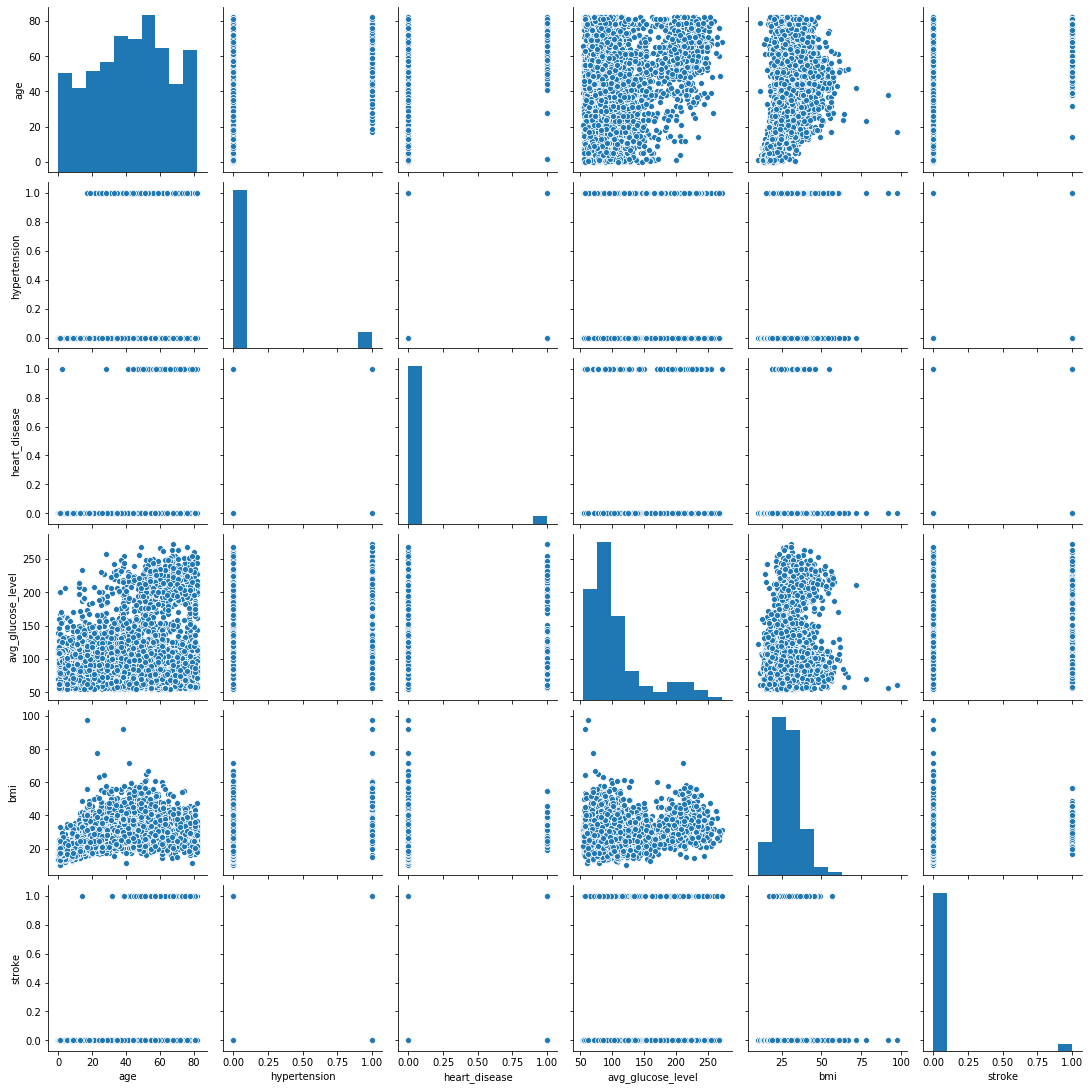

In [20]:
#Pair plot provides a visual representation of plotting every column with one another 
sns.pairplot(data)

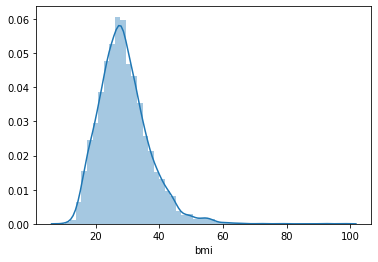

In [21]:
#Distributon plot of BMI
sns.distplot(data['bmi'])

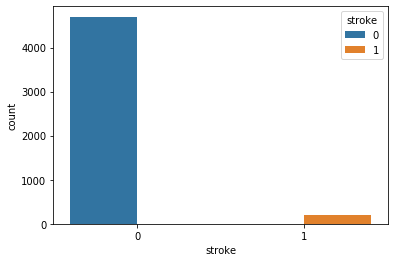

In [22]:
#We can visualize the count of values belonging to each category. In this graph, we can see that majority of the data is stroke = 1
sns.countplot(x = data['stroke'], hue = data['stroke'])

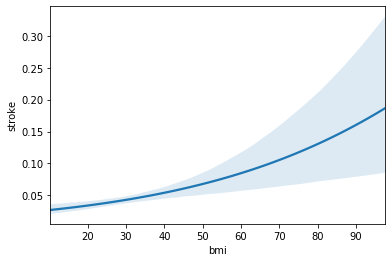

In [133]:
#Linear Regression plot of BMI v/s stroke
sns.regplot(x = data['bmi'], y = data['stroke'], scatter = False, logistic = True)

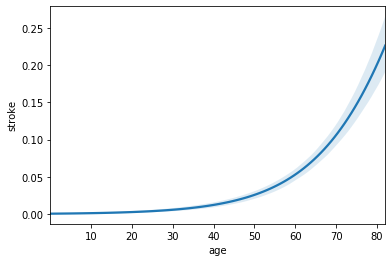

In [134]:
#Linear Regression plot of age v/s stroke
sns.regplot(x = data['age'], y = data['stroke'], scatter = False, logistic = True)

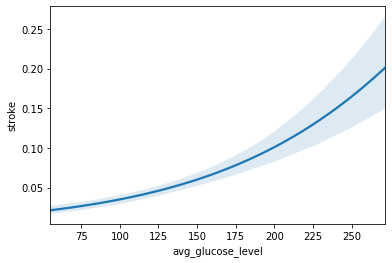

In [135]:
#Linear Regression plot of avg_glucose_level v/s stroke
sns.regplot(x = data['avg_glucose_level'], y = data['stroke'], scatter = False, logistic = True)

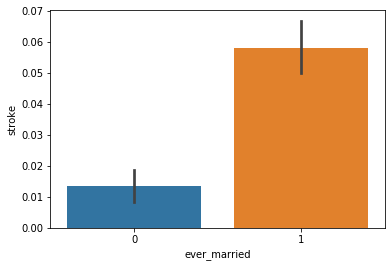

In [94]:
sns.barplot(x='ever_married', y ='stroke',data=data)

In [23]:
#Replace categorical values with numbers. The missing values are replaced with nan

data['smoking_status'].replace('formerly smoked', 1, inplace = True)
data['smoking_status'].replace('smokes', 1, inplace = True)
data['smoking_status'].replace('never smoked', 0, inplace = True)

data['smoking_status'].replace('Unknown', np.NaN, inplace = True)

In [24]:
#As there are multiple values of this feature, they can be combined as working and not working for simplicity.

data['work_type'].replace('Private', 'Working', inplace = True)
data['work_type'].replace('Self-employed', 'Working', inplace = True)
data['work_type'].replace('Govt_job', 'Working', inplace = True)

data['work_type'].replace('children', 'Not Working', inplace = True)
data['work_type'].replace('Never_worked', 'Not Working', inplace = True)

In [25]:
#Using label encoding we can encode the rest of the features as 0s and 1s
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['gender'] = labelencoder.fit_transform(data['gender'])
data['ever_married'] = labelencoder.fit_transform(data['ever_married'])
data['work_type'] = labelencoder.fit_transform(data['work_type'])
data['Residence_type'] = labelencoder.fit_transform(data['Residence_type'])

In [26]:
#Assign x and y

x = data.iloc[:,:len(data.columns)-1]
y = data.iloc[:,-1]

In [27]:
#Since there are many unknown values for 'smoking_status' we can use nearest neighbor imputer to fill them up

from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(x)
xtrans = imputer.transform(x)

In [28]:
#convert x_trans to dataframe
x_new = pd.DataFrame(xtrans, columns = data.columns[:-1])

In [30]:
#round up values

x_new['smoking_status'].replace(0.2, 0, inplace = True)
x_new['smoking_status'].replace(0.4, 0, inplace = True)
x_new['smoking_status'].replace(0.6, 1, inplace = True)
x_new['smoking_status'].replace(0.8, 1, inplace = True)

# ML Model 1 - KNN

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test =  train_test_split(x_new, y)

In [33]:
#Perform oversampling to obtain a balanced dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_new, y_train_new = oversample.fit_resample(X_train, y_train.ravel())

In [42]:
#Create KNN Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=3))])

In [43]:
knn_cv = cross_val_score(knn_pipeline, X_train_new, y_train_new, cv=10 ,scoring='accuracy')

In [44]:
#Confusion matrix of training dataset
from sklearn.metrics import confusion_matrix

knn_pipeline.fit(X_train_new, y_train_new);
knn_train_predict = knn_pipeline.predict(X_train)
knn_pred = knn_pipeline.predict(X_test)
knn_cm = confusion_matrix(y_train,knn_train_predict)
knn_cm

array([[3378,  141],
       [   2,  160]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, knn_pred))

print('Accuracy Score: ',accuracy_score(y_test,knn_pred))
print('F1 Score: ',f1_score(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1180
           1       0.08      0.21      0.12        47

    accuracy                           0.88      1227
   macro avg       0.52      0.56      0.53      1227
weighted avg       0.93      0.88      0.90      1227

Accuracy Score:  0.8777506112469438
F1 Score:  0.11764705882352942


In [91]:
#Confusion matrix of test dataset

knn_test = confusion_matrix(y_test,knn_pred)
knn_test

array([[1067,  113],
       [  37,   10]], dtype=int64)

# Model2 - Support Vector Machines

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.svm import SVC
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42, probability=True))])

In [47]:
svm_cv = cross_val_score(knn_pipeline, X_train_new, y_train_new, cv=10 ,scoring='accuracy')

In [48]:
#Confusion matrix of training dataset

from sklearn.metrics import confusion_matrix

svm_pipeline.fit(X_train_new, y_train_new);
svm_train_predict = svm_pipeline.predict(X_train)
svm_pred = svm_pipeline.predict(X_test)
svm_cm = confusion_matrix(y_train,svm_train_predict)
svm_cm

array([[3336,  183],
       [  76,   86]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, svm_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('F1 Score: ',f1_score(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1180
           1       0.14      0.26      0.18        47

    accuracy                           0.91      1227
   macro avg       0.55      0.60      0.56      1227
weighted avg       0.94      0.91      0.92      1227

Accuracy Score:  0.9095354523227384
F1 Score:  0.17777777777777776


In [92]:
#Confusion matrix of test dataset

svm_test = confusion_matrix(y_test,svm_pred)
svm_test

array([[1104,   76],
       [  35,   12]], dtype=int64)

# DNN -  Model 3

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
NN_model = keras.models.Sequential(
[keras.layers.Flatten(input_shape=[10]),
keras.layers.Dense(30, activation="relu"),
keras.layers.Dense(40, activation="relu"),
keras.layers.Dense(40, activation="relu"),
keras.layers.Dense(40, activation="relu"), 
keras.layers.Dense(2, activation="softmax")
])

In [52]:
NN_model.compile(
loss="sparse_categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate = 0.05),
metrics=["accuracy"])

In [53]:
history1 = NN_model.fit(X_train_new, y_train_new, epochs=100, verbose=1)

Epoch 1/100
220/220 [==============================] - 0s 969us/step - loss: 0.7590 - accuracy: 0.7187
Epoch 2/100
220/220 [==============================] - 0s 929us/step - loss: 0.5211 - accuracy: 0.7312
Epoch 3/100
220/220 [==============================] - 0s 984us/step - loss: 0.5221 - accuracy: 0.7383
Epoch 4/100
220/220 [==============================] - 0s 993us/step - loss: 0.5055 - accuracy: 0.7472
Epoch 5/100
220/220 [==============================] - 0s 870us/step - loss: 0.4873 - accuracy: 0.7579
Epoch 6/100
220/220 [==============================] - 0s 907us/step - loss: 0.4903 - accuracy: 0.7573
Epoch 7/100
220/220 [==============================] - 0s 907us/step - loss: 0.4935 - accuracy: 0.7552
Epoch 8/100
220/220 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7401
Epoch 9/100
220/220 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7120
Epoch 10/100
220/220 [==============================] - 0s 1ms/step - loss: 0

220/220 [==============================] - 0s 775us/step - loss: 0.6947 - accuracy: 0.5017
Epoch 80/100
220/220 [==============================] - 0s 875us/step - loss: 0.6948 - accuracy: 0.5026
Epoch 81/100
220/220 [==============================] - 0s 879us/step - loss: 0.6950 - accuracy: 0.5108
Epoch 82/100
220/220 [==============================] - 0s 852us/step - loss: 0.6944 - accuracy: 0.5094
Epoch 83/100
220/220 [==============================] - 0s 884us/step - loss: 0.6972 - accuracy: 0.4952
Epoch 84/100
220/220 [==============================] - 0s 848us/step - loss: 0.6943 - accuracy: 0.5060
Epoch 85/100
220/220 [==============================] - 0s 816us/step - loss: 0.6952 - accuracy: 0.5011
Epoch 86/100
220/220 [==============================] - 0s 861us/step - loss: 0.6962 - accuracy: 0.4963
Epoch 87/100
220/220 [==============================] - 0s 879us/step - loss: 0.6952 - accuracy: 0.4972
Epoch 88/100
220/220 [==============================] - 0s 852us/step - loss:

In [265]:
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, pred_nn))

print('Accuracy Score: ',accuracy_score(y_test, pred_nn))
print('Mean Squared Error: ',mean_squared_error(y_test, pred_nn))
print('F1 Score: ',f1_score(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1171
           1       0.11      0.48      0.18        56

    accuracy                           0.80      1227
   macro avg       0.54      0.65      0.53      1227
weighted avg       0.93      0.80      0.85      1227

Accuracy Score:  0.7970660146699267
Mean Squared Error:  0.20293398533007334
F1 Score:  0.1782178217821782


In [97]:
#Confusion matrix of test dataset

from sklearn.metrics import confusion_matrix

pred_nn = np.argmax(NN_model.predict(X_test), axis=-1)
nn_cm = confusion_matrix(y_test,pred_nn)
nn_cm

array([[   0, 1180],
       [   0,   47]], dtype=int64)

# Graphs for best algorithm

Auc :  0.7835336098572648


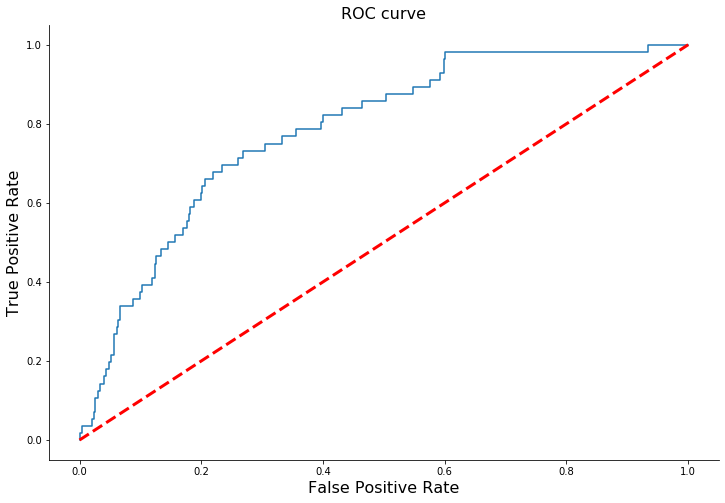

In [266]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,8));

plt.plot(fpr_lr, tpr_lr);
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
plt.title('ROC curve', fontsize=16);
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--');

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

print('Auc : ', auc(fpr_lr, tpr_lr))

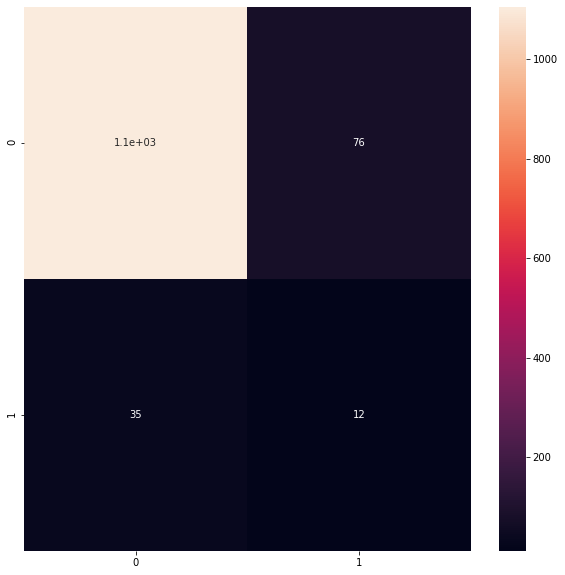

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, svm_pred)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

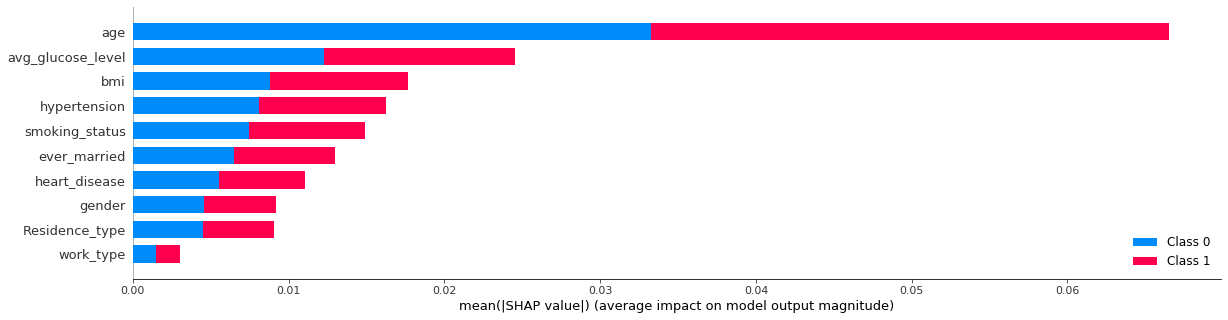

In [80]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train, y_train)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_size=(19.5,5), alpha=0.2)

In [86]:
y_score = svm_pipeline.decision_function(X_test)

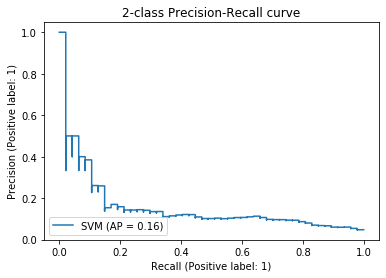

In [87]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="SVM")
_ = display.ax_.set_title("2-class Precision-Recall curve")

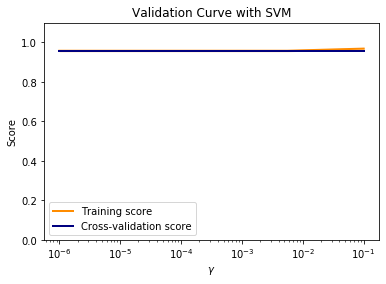

In [93]:
#Validation score v/s Training score
from sklearn.model_selection import validation_curve

X, y = x_new, y

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()